In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches

In [2]:
# Sharpening input
d_w = 215
l_p = 80
beta = math.radians(12)

In [3]:
# Machine settings
d_s = 12
d_j = 12
o_s = 50
h_c = 29

In [4]:
# calculate the angle to correct for the thickness of the jig
sj = (d_s + d_j)/2
tj = l_p - d_s/2
ts = math.sqrt(sj**2+tj**2)
alpha = math.atan(sj/tj)

In [5]:
# using https://en.wikipedia.org/wiki/Law_of_cosines to calculate h_r and h_n
my = beta + math.pi/2 - alpha
r = d_w/2
os = math.sqrt(ts**2 + r**2 - 2*ts*r*math.cos(my))
h_r = os - r + d_s/2
sx = math.sqrt(os**2 - o_s**2)
h_n = sx - h_c + d_s/2

In [6]:
print(f'h_r: {h_r: .1f}')
print(f'h_n: {h_n: .1f}')

h_r:  32.5
h_n:  101.3


## Plotting

In [7]:
alpha_2 = math.acos((r**2 - ts**2 + os**2)/(2*r*os))
alpha_3 = math.acos(o_s/os)
alpha_4 = math.pi - alpha_3 - alpha_2
alpha_5 = math.pi/2 - alpha_4
tx = r * math.cos(alpha_5)
xo = r * math.sin(alpha_5)

In [8]:
axel_center = (0, 0)
support_center = (o_s, h_c + h_n - d_s/2)
tipp = (-xo, tx)

In [9]:
# for plotting
T8_width = 230  # actually 250, but this looks better
T8_height = 230
T8_height_to_curve = 175
T8_width_between_curves = 160

(-150.0, 146.90728961109988)

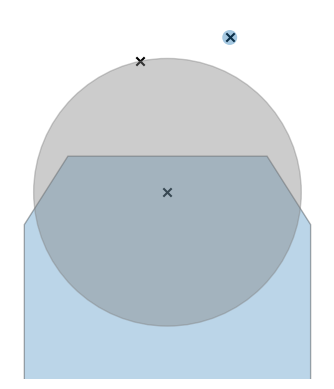

In [10]:
points = [axel_center, support_center, tipp]

fig, ax = plt.subplots()

plt.scatter(*zip(*points), marker="x", c='black')
ax.set_aspect('equal')

T8_base = h_c - T8_height
T8_top = h_c

Path = mpath.Path
path_data = [
    (Path.MOVETO, (-T8_width/2, T8_base)),
    (Path.LINETO, (T8_width/2, T8_base)),
    (Path.LINETO, (T8_width/2, T8_base + T8_height_to_curve)),
    (Path.LINETO, (T8_width_between_curves/2, T8_top)),
    (Path.LINETO, (-T8_width_between_curves/2, T8_top)),
    (Path.LINETO, (-T8_width/2,T8_base + T8_height_to_curve)),
    (Path.CLOSEPOLY, (-T8_width/2, T8_base)),
    ]
codes, verts = zip(*path_data)
T8_path = mpath.Path(verts, codes)
T8 = mpatches.PathPatch(T8_path, alpha=0.3)
ax.add_patch(T8)

support = mpatches.Circle(support_center, radius=d_s/2, alpha=0.4)
ax.add_patch(support)

stone = mpatches.Circle(axel_center, radius=d_w/2, alpha=0.4, color='grey')
ax.add_patch(stone)

ax.axis('off')
ax.set_ylim(bottom=-150)
